# ISEA Week 5 - Warm Up

Author: Lovenoor Aulck

In this exercise, we are going to look at the relationship between education and wages. The data we will use can be found here: 

https://www.kaggle.com/datasets/asaniczka/usa-wage-comparison-for-college-vs-high-school?resource=download

### Import packages

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import random
import seaborn as sns
from sklearn import datasets

In [1]:
sns.set_style('whitegrid')

NameError: name 'sns' is not defined

### Import and inspect data

In [1]:
data = pd.read_csv('college_wages.csv')

NameError: name 'pd' is not defined

In [4]:
data.head()

,year,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03


In [5]:
data.describe()

,year,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1997.50000,20.876600,34.768600,23.832600,39.988400,17.571600,28.926400
std,14.57738,0.742743,3.306645,1.225697,3.734945,0.854342,3.760532
min,1973.00000,19.620000,30.040000,22.110000,35.160000,16.450000,22.940000
25%,1985.25000,20.392500,31.875000,22.945000,36.605000,16.890000,25.462500
50%,1997.50000,20.855000,34.205000,23.695000,39.485000,17.370000,29.425000
75%,2009.75000,21.480000,37.122500,24.307500,42.340000,18.317500,31.975000
max,2022.00000,22.700000,41.650000,26.900000,49.010000,19.360000,35.410000


In [6]:
data.isna().sum()

year                      0
high_school               0
bachelors_degree          0
men_high_school           0
men_bachelors_degree      0
women_high_school         0
women_bachelors_degree    0
dtype: int64

### Plot data

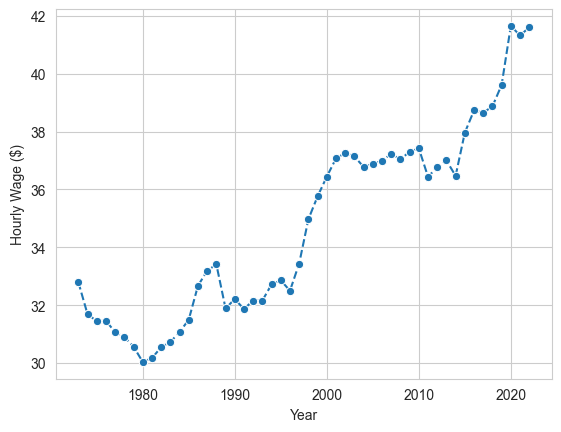

In [7]:
ax = sns.lineplot(data = data[['year', 'bachelors_degree']], 
                x = 'year', 
                y = 'bachelors_degree',
                linestyle = '--',
                marker = 'o');
ax.set(xlabel = 'Year', ylabel = 'Hourly Wage ($)');

In [8]:
reshaped = data[['year', 'bachelors_degree', 'high_school']]
reshaped = pd.melt(reshaped, id_vars = ['year'])
reshaped.columns = ['year', 'schooling', 'salary']
reshaped.head()

,year,schooling,salary
0,2022,bachelors_degree,41.60
1,2021,bachelors_degree,41.32
2,2020,bachelors_degree,41.65
3,2019,bachelors_degree,39.61
4,2018,bachelors_degree,38.87


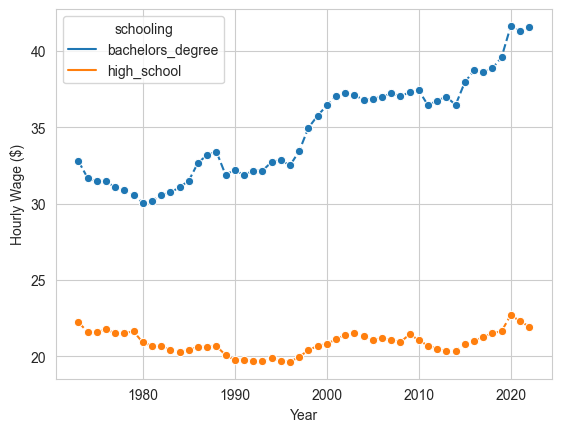

In [9]:
ax = sns.lineplot(data = reshaped, 
                x = 'year', 
                y = 'salary',
                hue = 'schooling',
                linestyle = '--',
                marker = 'o');
ax.set(xlabel = 'Year', ylabel = 'Hourly Wage ($)');

### Run regression

In [10]:
X = reshaped[['year', 'schooling']]
Y = reshaped[['salary']]

In [11]:
X['bachelors'] = (X.schooling == 'bachelors_degree').astype(int)
X = X.drop('schooling', axis = 1)
X = sm.add_constant(X)
X.head()

,const,year,bachelors
0,1.0,2022,1
1,1.0,2021,1
2,1.0,2020,1
3,1.0,2019,1
4,1.0,2018,1


In [12]:
model = sm.OLS(Y, X)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     795.3
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           6.85e-61
Time:                        09:49:00   Log-Likelihood:                -198.41
No. Observations:                 100   AIC:                             402.8
Df Residuals:                      97   BIC:                             410.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -199.3491     24.733     -8.060      0.000    -248.437    -150.261
year           0.1103      0.012      8.905      0.000       0.086       0.135
bachelors     13.8920      0.357     38.876      0.000      13.183      14.601
==============================================================================
Omnibus:                        6.051   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.868
Skew:                           0.541   Prob(JB):                       0.0532
Kurtosis:                       2.513   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Add noise

In [13]:
random.seed(49)

In [14]:
X['noise1'] = [random.random() for x in range(0, len(X))]
X['noise2'] = [random.random() for x in range(0, len(X))]
X['noise3'] = [random.random() for x in range(0, len(X))]

In [15]:
model = sm.OLS(Y, X)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     353.3
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           2.70e-59
Time:                        09:49:00   Log-Likelihood:                -191.96
No. Observations:                 100   AIC:                             395.9
Df Residuals:                      94   BIC:                             411.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -191.1437     24.013     -7.960      0.000    -238.822    -143.465
year           0.1056      0.012      8.782      0.000       0.082       0.129
bachelors     13.8344      0.346     39.961      0.000      13.147      14.522
noise1        -0.4334      0.641     -0.676      0.501      -1.706       0.839
noise2         0.8957      0.559      1.602      0.112      -0.214       2.005
noise3         1.9654      0.624      3.148      0.002       0.726       3.205
==============================================================================
Omnibus:                        2.834   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.717
Skew:                           0.339   Prob(JB):                        0.257
Kurtosis:                       2.561   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""